# Getting started:

# Importing Libraries:

In [36]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2

import keras_tuner as kt
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

In [2]:
tf.__version__

'2.16.1'

# Preprocessing:

In [3]:
image_dir = Path('New folder')

In [4]:
image_dir

WindowsPath('New folder')

In [5]:
dir_list = list(image_dir.glob('*.jpg'))

In [6]:
dir_list

[WindowsPath('New folder/0_1.JPG0dim.jpg'),
 WindowsPath('New folder/0_1.JPG0rot.jpg'),
 WindowsPath('New folder/0_1.JPG0whs.jpg'),
 WindowsPath('New folder/0_1.JPG10dim.jpg'),
 WindowsPath('New folder/0_1.JPG10rot.jpg'),
 WindowsPath('New folder/0_1.JPG10whs.jpg'),
 WindowsPath('New folder/0_1.JPG11dim.jpg'),
 WindowsPath('New folder/0_1.JPG11rot.jpg'),
 WindowsPath('New folder/0_1.JPG11whs.jpg'),
 WindowsPath('New folder/0_1.JPG12dim.jpg'),
 WindowsPath('New folder/0_1.JPG12rot.jpg'),
 WindowsPath('New folder/0_1.JPG12whs.jpg'),
 WindowsPath('New folder/0_1.JPG13dim.jpg'),
 WindowsPath('New folder/0_1.JPG13rot.jpg'),
 WindowsPath('New folder/0_1.JPG13whs.jpg'),
 WindowsPath('New folder/0_1.JPG14dim.jpg'),
 WindowsPath('New folder/0_1.JPG14rot.jpg'),
 WindowsPath('New folder/0_1.JPG14whs.jpg'),
 WindowsPath('New folder/0_1.JPG15dim.jpg'),
 WindowsPath('New folder/0_1.JPG15rot.jpg'),
 WindowsPath('New folder/0_1.JPG15whs.jpg'),
 WindowsPath('New folder/0_1.JPG16dim.jpg'),
 WindowsPath(

In [7]:
image_count = len(dir_list)
image_count

2211

In [9]:
name_list = []
for i in dir_list:
    name_list.append(int(os.path.basename(i).split("_")[0]))
name_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,


In [10]:
max(name_list)

50

In [11]:
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)
images

[array([[[194, 194, 194],
         [204, 204, 204],
         [204, 204, 204],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],
 
        [[193, 193, 193],
         [177, 177, 177],
         [186, 186, 186],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],
 
        [[199, 199, 199],
         [204, 204, 204],
         [194, 194, 194],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],
 
        ...,
 
        [[197, 197, 197],
         [197, 197, 197],
         [195, 195, 195],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],
 
        [[197, 197, 197],
         [198, 198, 198],
         [198, 198, 198],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],
 
        [[195, 195, 195],
         [196, 196, 196],
         [197, 197, 197],
         ...,
         [196, 196, 196],
  

In [12]:
images_list = np.array(images)
images_list


array([[[[194, 194, 194],
         [204, 204, 204],
         [204, 204, 204],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],

        [[193, 193, 193],
         [177, 177, 177],
         [186, 186, 186],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],

        [[199, 199, 199],
         [204, 204, 204],
         [194, 194, 194],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],

        ...,

        [[197, 197, 197],
         [197, 197, 197],
         [195, 195, 195],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],

        [[197, 197, 197],
         [198, 198, 198],
         [198, 198, 198],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],

        [[195, 195, 195],
         [196, 196, 196],
         [197, 197, 197],
         ...,
         [196, 196, 196],
        

In [13]:
name_list = np.array(name_list)
name_list

array([0, 0, 0, ..., 9, 9, 9])

In [14]:
name_list_encoded = name_list
images_list = images_list / 255.0

In [15]:
images_list.shape

(2211, 28, 28, 3)

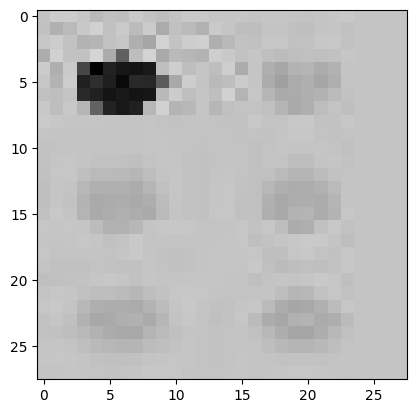

In [16]:
plt.imshow(images_list[0])

In [17]:
images_list.shape

(2211, 28, 28, 3)

In [18]:
name_list_encoded.shape

(2211,)

In [19]:
name_list_encoded

array([0, 0, 0, ..., 9, 9, 9])

# Splitting in train and test data:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list_encoded, test_size=0.2, random_state=42)

# Creating model:

In [22]:
from tensorflow import keras
from tensorflow.keras import regularizers
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0015)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0015)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0013)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0013)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=576, activation="relu", kernel_regularizer=regularizers.l2(0.0011)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.6),  # Add dropout with a dropout rate of 0.5
    keras.layers.Dense(units=288, activation="relu", kernel_regularizer=regularizers.l2(0.0011)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),  # Add dropout with a dropout rate of 0.5
    keras.layers.Dense(units=52, activation="softmax")  # output layer
])


In [23]:
model.compile(optimizer='Adam', loss="SparseCategoricalCrossentropy", metrics=["accuracy","sparse_categorical_accuracy"])

In [24]:
es1 = EarlyStopping(patience=20, monitor="val_acc", mode="min")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="min")


history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.1,     
                    callbacks=[es1, es2])

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.0912 - loss: 5.7034 - sparse_categorical_accuracy: 0.0912 - val_accuracy: 0.0339 - val_loss: 5.6069 - val_sparse_categorical_accuracy: 0.0339
Epoch 2/100
 1/50 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.3750 - loss: 3.6292 - sparse_categorical_accuracy: 0.3750

c:\Users\kanya\Documents\Visual Studio Programmes\muni_ra_babu\project\muni\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,sparse_categorical_accuracy,val_accuracy,val_loss,val_sparse_categorical_accuracy
  current = self.get_monitor_value(logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 0.3421 - loss: 3.7902 - sparse_categorical_accuracy: 0.3421 - val_accuracy: 0.0565 - val_loss: 6.5676 - val_sparse_categorical_accuracy: 0.0565
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.4729 - loss: 3.2218 - sparse_categorical_accuracy: 0.4729 - val_accuracy: 0.0452 - val_loss: 7.1690 - val_sparse_categorical_accuracy: 0.0452
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.5785 - loss: 2.7571 - sparse_categorical_accuracy: 0.5785 - val_accuracy: 0.0565 - val_loss: 7.0067 - val_sparse_categorical_accuracy: 0.0565
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.6178 - loss: 2.5762 - sparse_categorical_accuracy: 0.6178 - val_accuracy: 0.0621 - val_loss: 7.2125 - val_sparse_categorical_accuracy: 0.0621
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.6714 - loss: 2.3521 - sparse_categorical_accuracy: 0.6714 - val_accuracy: 0.0791 - val_loss: 5.9981 - val_sp

In [25]:
X_train[0].shape

(28, 28, 3)

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 576)            │       332,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 576)            │         2,304 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 288)            │       166,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 288)            │         1,152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 52)             │        15,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,896,574 (7.23 MB)

 Trainable params: 631,444 (2.41 MB)

 Non-trainable params: 2,240 (8.75 KB)

 Optimizer params: 1,262,890 (4.82 MB)

# Evaluating model:

In [27]:
time = np.arange(1, len(history.history['loss'])+1)

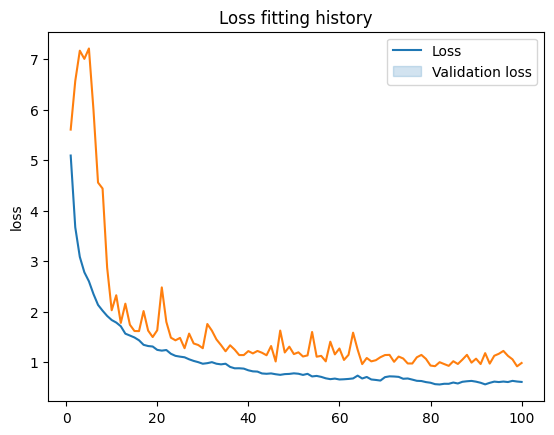

In [28]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])

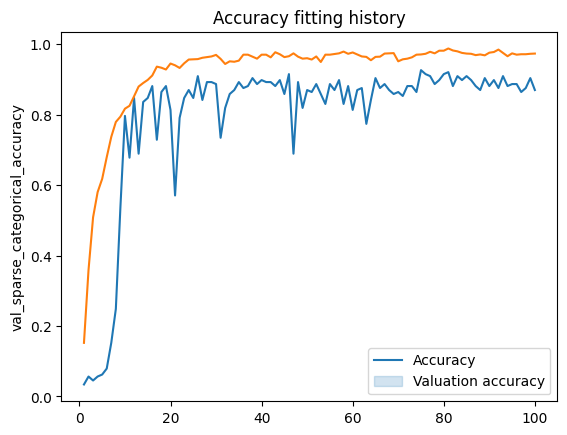

In [29]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])

In [30]:
model.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8885 - loss: 1.0796 - sparse_categorical_accuracy: 0.8885


[1.0113208293914795, 0.8961625099182129, 0.8961625099182129]

In [32]:
model.save('custom_model.h5')

In [37]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [38]:
ans=model.predict(X_test)
for i in ans:
    temp=max(i)
    print(np.argmax(i))


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
29
36
33
1
35
38
28
1
33
4
40
27
34
27
28
1
41
1
11
4
28
1
45
45
16
33
33
4
4
0
29
18
42
29
36
46
29
1
9
16
47
50
9
10
44
36
31
43
46
50
10
27
9
36
42
29
42
47
35
45
40
34
45
10
28
10
1
4
46
46
31
18
42
28
38
4
48
1
11
50
38
29
32
10
10
1
42
18
9
1
32
23
45
36
1
45
10
34
32
50
46
1
27
10
26
1
23
46
38
43
16
50
28
1
0
41
50
32
10
47
34
10
28
28
36
34
18
42
34
31
32
43
35
45
11
35
1
41
4
23
48
16
42
27
34
35
10
26
47
23
41
1
23
33
42
28
32
21
41
10
27
26
35
34
47
0
27
41
40
33
33
26
46
36
18
42
41
38
41
36
28
47
1
29
28
35
18
32
41
42
29
4
18
32
33
28
23
11
31
23
26
33
35
23
23
0
42
11
21
31
28
10
46
41
45
34
0
48
44
32
38
18
26
34
21
45
41
29
18
34
44
16
34
28
48
42
47
0
50
0
41
36
40
50
11
38
45
21
38
35
50
46
50
21
10
26
44
34
16
1
44
34
50
26
31
0
10
1
50
33
26
48
9
9
48
10
46
11
18
9
10
26
1
38
28
47
32
46
43
26
16
21
40
40
35
11
50
38
44
34
45
34
1
31
45
11
23
18
18
21
45
29
9
16
34
16
32
21
1
36
29
28
18
32
38
0
27
18
27
32
45
45
46
28
50
26

In [39]:
y_test

array([29, 36,  9,  1, 35, 38, 28,  1, 33,  4, 40, 27, 34, 41, 28,  1, 35,
        1, 11,  4, 28,  1, 45, 45, 16, 23, 33,  4,  4,  0, 29, 18, 42, 29,
       47, 46, 29,  1,  9, 16, 47, 50,  9, 10,  4, 36, 31, 43, 46, 50, 32,
       27,  9,  4, 42, 29, 42, 47, 35, 45, 40, 34, 45, 10, 11, 10,  1,  4,
       46, 46, 31, 18, 42, 28, 38,  4, 48,  1, 11, 50, 38, 29, 32, 10, 16,
        1, 42, 18,  9,  1, 32, 23, 45, 40,  1, 45, 10, 34, 32, 50, 32,  1,
       27, 10, 26,  1, 23, 46, 38, 43, 16, 50, 28,  1, 16, 41, 31, 32, 10,
       47, 34, 10, 28, 28, 36, 34, 18, 42, 34, 31, 32, 43, 35, 45, 11, 35,
       32, 41,  4, 23, 48, 16, 42, 23, 34, 35, 10, 26, 47, 23, 16,  1, 48,
       33, 42, 28, 32, 21, 41, 10, 31, 26, 35, 26, 47,  0, 27, 41, 40, 23,
       33, 26, 46, 36, 18, 42, 41, 38, 41, 36, 28, 47,  1, 29, 28, 35, 18,
       32, 41, 42, 29,  4, 18, 32, 33, 28, 23, 11, 31, 23, 26, 33, 35, 33,
       23,  0, 42, 11, 21, 31, 28, 10, 46, 11, 45, 34,  0, 23, 44, 45, 38,
       18, 26, 34, 21, 45

In [96]:
print(tf.__version__)
print(tf.keras.__version__)


2.16.1
3.3.3
